In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1280, 721, 3)


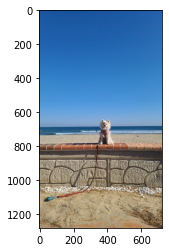

In [4]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image8.jpg'  
bg_orig = cv2.imread(bg_path) 

print(bg_orig.shape)
plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

(1280, 563, 3)


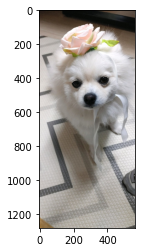

In [5]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_dog.jpg'  
img_orig = cv2.imread(img_path) 
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
# 모델에 이미지 입력
bg_segvalues, bg_output = model.segmentAsPascalvoc(bg_path)

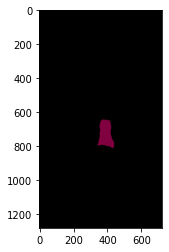

In [8]:
plt.imshow(bg_output)
plt.show()

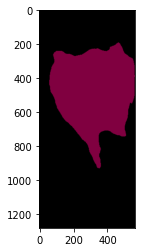

In [9]:
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [11]:
seg_color = (128,0,64)

(1280, 721)


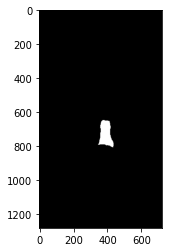

In [12]:
# seg_color로만 이루어진 mask 확인
bg_seg_map = np.all(bg_output==seg_color, axis=-1)
print(bg_seg_map.shape)
plt.imshow(bg_seg_map, cmap='gray')
plt.show()

(1280, 563)


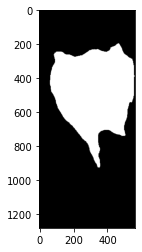

In [13]:
# seg_color로만 이루어진 mask 확인
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

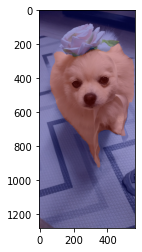

In [14]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

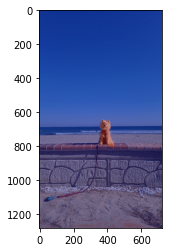

In [16]:
bg_show = bg_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
bg_mask = bg_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
bgcolor_mask = cv2.applyColorMap(bg_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
bg_show = cv2.addWeighted(bg_show, 0.6, bgcolor_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(bg_show, cv2.COLOR_BGR2RGB))
plt.show()

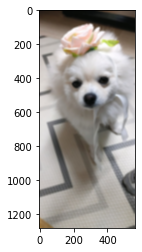

In [18]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

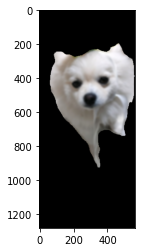

In [19]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_mask_color)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

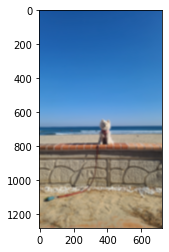

In [21]:
bg_orig_blur = cv2.blur(bg_orig, (13,13))  
plt.imshow(cv2.cvtColor(bg_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

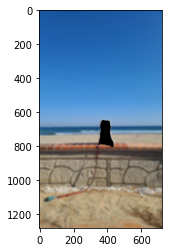

In [22]:
bg_mask_color = cv2.cvtColor(bg_mask, cv2.COLOR_GRAY2BGR)
bg_mask = cv2.bitwise_not(bg_mask_color)
bg_blur = cv2.bitwise_and(bg_orig_blur, bg_mask)
plt.imshow(cv2.cvtColor(bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
img_concat = np.where(bgcolor_mask==255, img_bg_blur, bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (1280,721,3) (1280,563,3) (1280,721,3) 

크로마키 적용 이미지 크기와 위의 적용할 이미지 사진 size가 다름으로 인한 오류 발생